In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid_function(x) : 
    return (1/(1+np.exp(-x)))

In [3]:
def ReLU_function(x) :
    return np.maximum(0, x)

In [4]:
x = np.random.randn(1000, 100) 
node_num = 100
hidden_layer_size = 5 #은닉층이 5개
activations = {} #활성화 값을 저장

<br><hr><br>

# 가중치(활성화값) 노드의 표준 편차(분포된 정도)를 바꿔가며 <br> 활성화 값들의 분포가 어떻게 변화하는지 확인해본다.

<hr>

## A. 활성화 함수가 Sigmoid (혹은 Tanh)인 경우 (= 좌우대칭이라 중앙 부근이 선현인 함수*)

### 1) 표준편차가 1인 정규분포를 가중치 노드로 사용

In [17]:
for i in range(hidden_layer_size) : 
    if i!=0 : 
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) * 1 #표준편차가 1인 정규분포
    a = np.dot(x, w) 
    z = sigmoid_function(a) 
    activations[i] = z

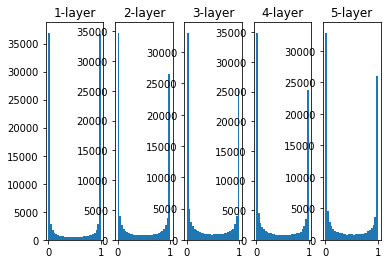

In [18]:
for i, a in activations.items() : 
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

<hr>

### 2) 표준편차가 0.01인 정규분포를 가중치 노드로 사용

In [20]:
for i in range(hidden_layer_size) : 
    if i!=0 : 
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) * 0.01 #표준편차가 0.01인 정규분포
    a = np.dot(x, w) 
    z = sigmoid_function(a) 
    activations[i] = z

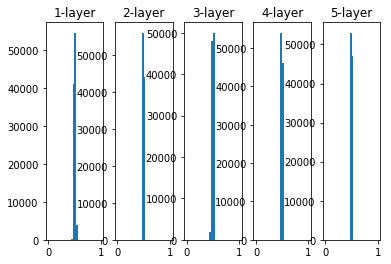

In [21]:
for i, a in activations.items() : 
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

<hr>

###  3-1) Xavier 초기값 & Sigmoid 활성화 함수 사용

In [22]:
for i in range(hidden_layer_size) : 
    if i!=0 : 
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num) #표준편차가 1/(n**0.5)인 정규분포 (= Xavier 초기값)
    a = np.dot(x, w) 
    z = sigmoid_function(a) 
    activations[i] = z

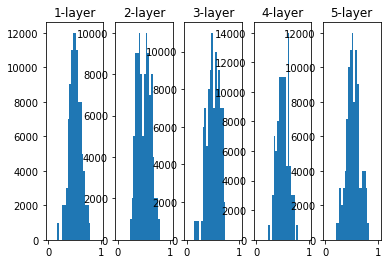

In [23]:
for i, a in activations.items() : 
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

<hr>

### 3-2) Xavier 초기값 & tahn 함수 사용

In [40]:
for i in range(hidden_layer_size) : 
    if i!=0 : 
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num) #표준편차가 1/(n**0.5)인 정규분포 (= Xavier 초기값)
    a = np.dot(x, w) 
    z = np.tanh(a) 
    activations[i] = z

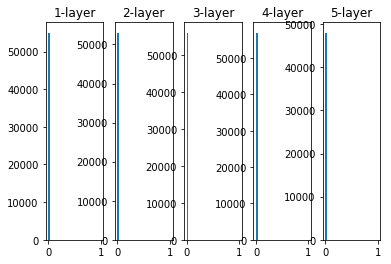

In [41]:
for i, a in activations.items() : 
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

<br><hr><br>

## B. 활성화 함수가 ReLU인 경우 (=음의 영역이 0이 노드가 더 넓게 분포될 필요가 있다.)

### 1) 표준편차가 0.01인 정규분포를 가중치 노드로 사용

In [42]:
for i in range(hidden_layer_size) : 
    if i!=0 : 
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) * 0.01 #표준편차가 0.01인 정규분포
    a = np.dot(x, w) 
    z = ReLU_function(a) 
    activations[i] = z

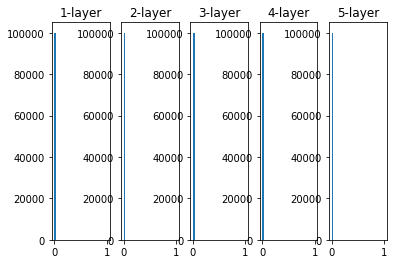

In [43]:
for i, a in activations.items() : 
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

<hr>

### 2) Xavier 초기값 사용

In [44]:
for i in range(hidden_layer_size) : 
    if i!=0 : 
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num) #표준편차가 1/(n**0.5)인 정규분포 (= Xavier 초기값)
    a = np.dot(x, w) 
    z = ReLU_function(a) 
    activations[i] = z

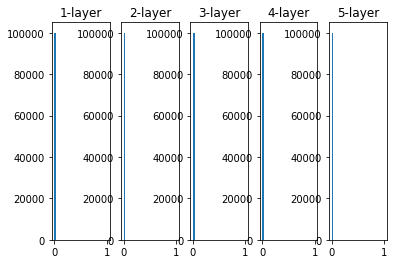

In [45]:
for i, a in activations.items() : 
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

<hr>

### 3) He 초기값 (Kaiming He의 이름을 따서 만들어진 ReLU 전용 초기값)

In [46]:
for i in range(hidden_layer_size) : 
    if i!=0 : 
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) / np.sqrt(2/node_num) #표준편차가 1/(n**0.5)인 정규분포 (= Xavier 초기값)
    a = np.dot(x, w) 
    z = ReLU_function(a) 
    activations[i] = z

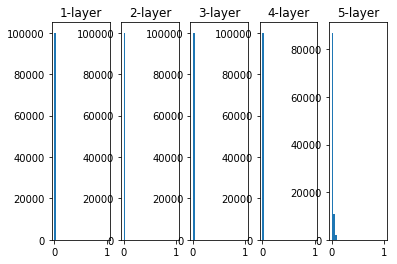

In [47]:
for i, a in activations.items() : 
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

<hr>